In [1]:
#stuff from Ted

import tensorflow as tf
from tensorflow.keras import datasets, layers, models, metrics, Model
from tensorflow.keras.callbacks import Callback
#from data import load_image_h5
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt
import h5py
from tensorflow import reshape
import datetime
%load_ext tensorboard
print(tf.__version__)

2.2.0


In [2]:
dataset = h5py.File('simu_HDF_thistimeforReal.h5', 'r')
num_diodes = dataset['Num_diodes'][...]
x_pos = (dataset['Xpos'][...])/100
y_pos = (dataset['Ypos'][...])/100
histgrid = dataset['histgrid'][...]
output = np.vstack((x_pos,y_pos)) #define new, single variable for x and y position
output = np.transpose(output) #original definition was sideways, so we transposed it
dataset.close()

In [3]:
print(output[46])

#so I know there are 132 arrays are contained within the first layer of the first array of the "histgrid" key 
#(this is true for all values from 0-341, meaning there are 342 arrays of data within histgrid that each 132 arrays within)

print(len(histgrid[0][0]))

#so I know the number of... time steps (?) taken per array (1000)
#it's the number of data points taken at each x and y diode I think


[-20.  24.]
132


In [4]:
print(histgrid.shape)

(1001, 342, 132)


In [5]:
values = [6,54,117,174,196]

#concern?: 117, 174

# ONCE: 29, 119, 315, 55, 191, 253, 32, 131
# MORE THAN ONCE: 66, 6, 221

9.0
11.0


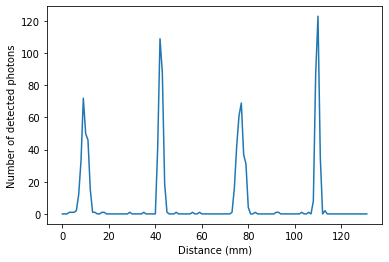

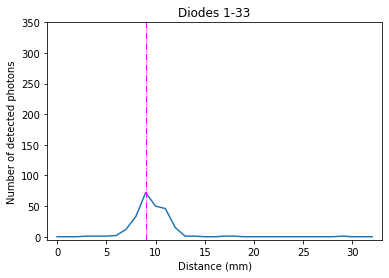

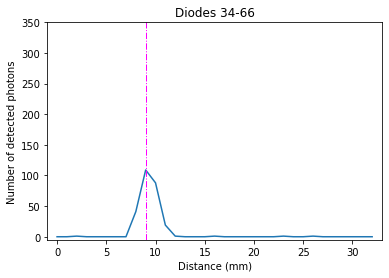

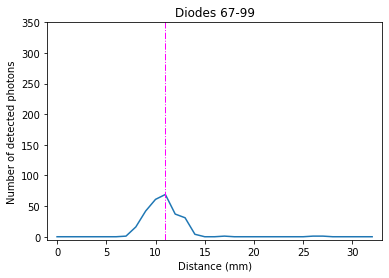

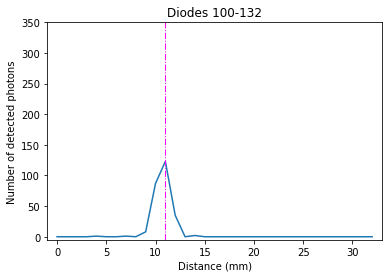

In [9]:
event_num = 879 #int between 0 and 1000
position = 33 #int between 0 and 341


#x and y at the "position;" the correct peak location
x_peak_value = round(((output[position][0]+48)/100)*33)
y_peak_value = round(((output[position][1]+48)/100)*33)

print(x_peak_value)
print(y_peak_value)
 
test_histogram = []
for i in range(132):
        test_histogram.append(histgrid[event_num][position][i])    
np.array(test_histogram)

#plt.axis([0, 132, 0, 160])
plt.xlabel('Distance (mm)')
plt.ylabel('Number of detected photons')
plt.plot(test_histogram)
plt.show()

test_histogram1 = []
for i in range(33):
    test_histogram1.append(histgrid[event_num][position][i])   
np.array(test_histogram1)

plt.title('Diodes 1-33')
plt.xlabel('Distance (mm)')
plt.ylabel('Number of detected photons')
plt.axis([-1, 33, -5, 350])
plt.plot(test_histogram1)
plt.axvline(x = x_peak_value, color = "magenta", linewidth=1, linestyle='dashdot')
plt.show()

test_histogram2 = []
for i in range(33,66):
    test_histogram2.append(histgrid[event_num][position][i])     
np.array(test_histogram2)

plt.title('Diodes 34-66')
plt.xlabel('Distance (mm)')
plt.ylabel('Number of detected photons')
plt.axis([-1, 33, -5, 350])
plt.plot(test_histogram2)
plt.axvline(x = x_peak_value, color = "magenta", linewidth=1, linestyle='dashdot')
plt.show()

test_histogram3 = []
for i in range(66,99):
    test_histogram3.append(histgrid[event_num][position][i])     
np.array(test_histogram3)

plt.title('Diodes 67-99')
plt.xlabel('Distance (mm)')
plt.ylabel('Number of detected photons')
plt.axis([-1, 33, -5, 350])
plt.plot(test_histogram3)
plt.axvline(x = y_peak_value, color = "magenta", linewidth=1, linestyle='dashdot')
plt.show()

test_histogram4 = []
for i in range(99,132):
    test_histogram4.append(histgrid[event_num][position][i])    
np.array(test_histogram4)

plt.title('Diodes 100-132')
plt.xlabel('Distance (mm)')
plt.ylabel('Number of detected photons')
plt.axis([-1, 33, -5, 350])
plt.plot(test_histogram4)
plt.axvline(x = y_peak_value, color = "magenta", linewidth=1, linestyle='dashdot') 
plt.show()